In [1]:
import cv2 # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

# Step 1: Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include channel dimension (1 for grayscale images)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize the data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 2: Build the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Step 3: Compile and train the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Capture the training history
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)



c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.7736 - loss: 0.6713 - val_accuracy: 0.9728 - val_loss: 0.0878
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9581 - loss: 0.1314 - val_accuracy: 0.9805 - val_loss: 0.0619
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.9713 - loss: 0.0964 - val_accuracy: 0.9809 - val_loss: 0.0596
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9729 - loss: 0.0866 - val_accuracy: 0.9854 - val_loss: 0.0461
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 50ms/step - accuracy: 0.9789 - loss: 0.0680 - val_accuracy: 0.9858 - val_loss: 0.0492
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 48ms/step - accuracy: 0.9805 - loss: 0.0663 - val_accuracy: 0.9804 - val_loss: 0.0643
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9802 - loss: 0.0603 - val_accuracy: 0.9894 - val_loss: 0.0373
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.9834 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted Digit: 2


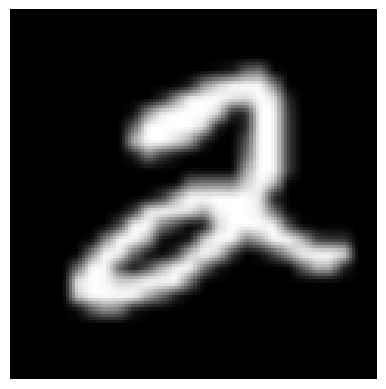

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit: 4


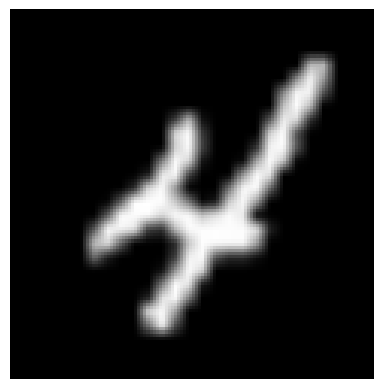

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Digit: 6


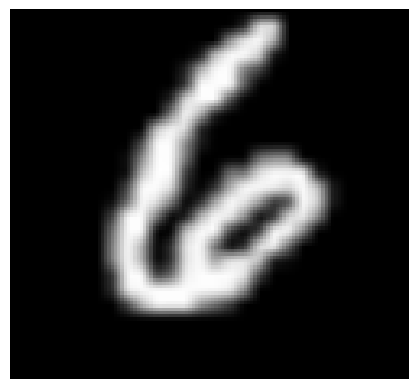

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 7


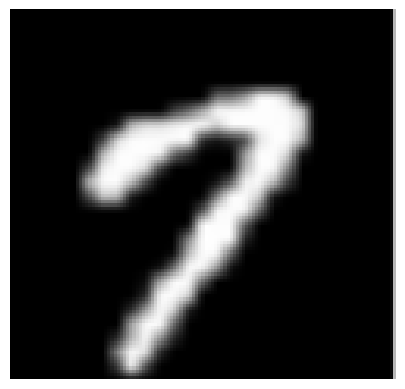

In [2]:
# Step 4: Load, preprocess, and predict the images
image_paths = [r'C:\Users\ravi\Desktop\2pic.png',r'C:\Users\ravi\Desktop\4pic.png',r'C:\Users\ravi\Desktop\6pic.png',r'C:\Users\ravi\Desktop\7pic.png']
for image_path in image_paths:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f'Error loading image: {image_path}')
        continue
    img_resized = cv2.resize(img, (28, 28))
    img_normalized = img_resized / 255.0
    img_reshaped = img_normalized.reshape(1, 28, 28, 1)

    prediction = model.predict(img_reshaped)
    predicted_class = np.argmax(prediction, axis=1)
    print(f'Predicted Digit: {predicted_class[0]}')
    
    # Display the image and prediction
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()


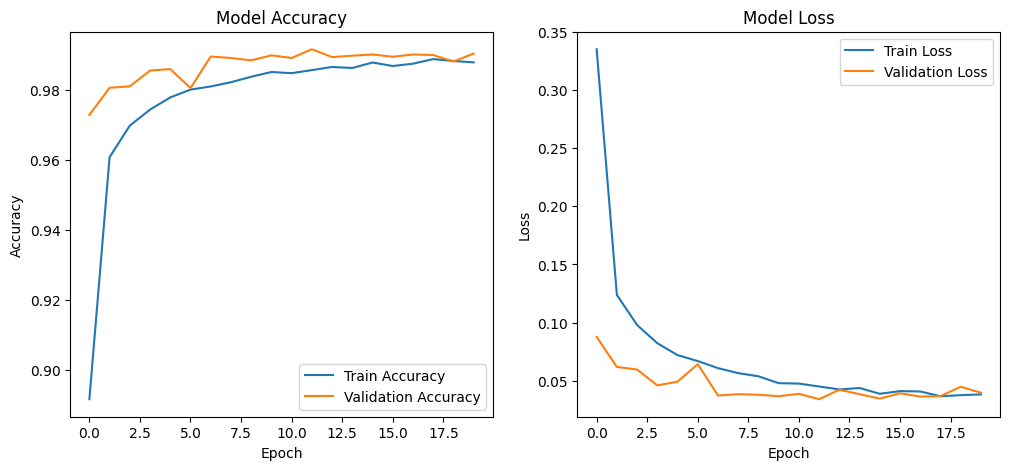

In [3]:
# Step 5: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Confusion Matrix:
 [[ 974    1    0    0    0    0    1    2    1    1]
 [   0 1131    1    0    0    0    1    1    1    0]
 [   1    0 1018    1    0    0    3    9    0    0]
 [   0    0    2  999    0    3    0    5    1    0]
 [   0    0    0    0  970    0    2    0    0   10]
 [   0    0    0    3    0  886    1    1    0    1]
 [   1    3    1    0    1    2  949    0    1    0]
 [   0    1    5    0    0    1    0 1021    0    0]
 [   0    1    3    1    1    1    0    0  962    5]
 [   0    0    0    0    2    2    0    3    1 1001]]

Accuracy: 99.11%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0

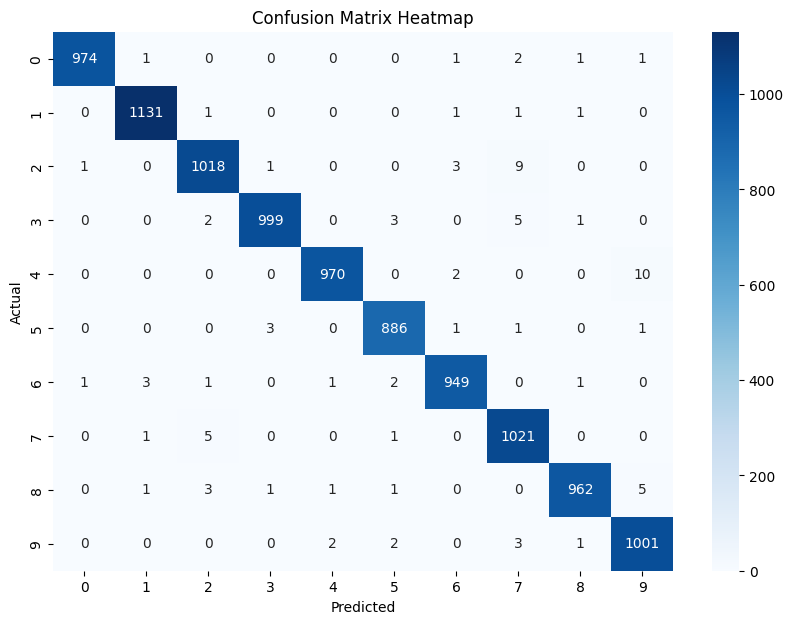

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def cal_accuracy(y_test, predicted_class):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predicted_class)
    
    # Print the confusion matrix
    print("\nConfusion Matrix:\n", cm)
    
    # Print the accuracy
    accuracy = accuracy_score(y_test, predicted_class) * 100
    print("\nAccuracy: {:.2f}%".format(accuracy))
    
    # Print the classification report
    print("\nClassification Report:\n", classification_report(y_test, predicted_class))
    
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Example of using the function after making predictions
y_pred = model.predict(X_test)
predicted_class = np.argmax(y_pred, axis=1)

# Call the function with the correct arguments
cal_accuracy(y_test, predicted_class)


In [4]:
# for Reference testing
image_paths = r"C:\Users\ravi\Desktop\2pic.png"
img = cv2.imread(image_paths, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_normalized = img_resized / 255.0
img_reshaped = img_normalized.reshape(1, 28, 28, 1)
prediction = model.predict(img_reshaped)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Digit: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: [2]
